In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<div style="text-align:center; background-color:#dc3545; padding:20px;">
  <h1 style="font-size:36px; color:#ffeeba;"><b>1.EDA (Explotary Data Analysis)</b></h1>
</div>


In [25]:
df = pd.read_csv(r'F:\Data Science Projects\Text Document Classification\data\df_file.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [27]:
df.tail(20)

,Text,Label
2205,Barclays profits hit record level\n \n Barclay...,4
2206,Asian banks halt dollar's slide\n \n The dolla...,4
2207,Venezuela and China sign oil deal\n \n Venezue...,4
2208,UK homes hit Â£3.3 trillion total\n \n The val...,4
2209,China's Shanda buys stake in Sina\n \n Chinese...,4
2210,EU 'too slow' on economic reforms\n \n Most EU...,4
2211,Economy 'strong' in election year\n \n UK busi...,4
2212,Saab to build Cadillacs in Sweden\n \n General...,4
2213,Bad weather hits Nestle sales\n \n A combinati...,4
2214,US Ahold suppliers face charges\n \n US prosec...,4


In [28]:
df['Label'].unique()

array([0, 1, 2, 3, 4])

In [29]:
df['Label'].value_counts()

Label
1    511
4    510
0    417
2    401
3    386
Name: count, dtype: int64

C:\Users\LENOVO  LS\AppData\Local\Temp\ipykernel_13972\2784532637.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='BuPu')


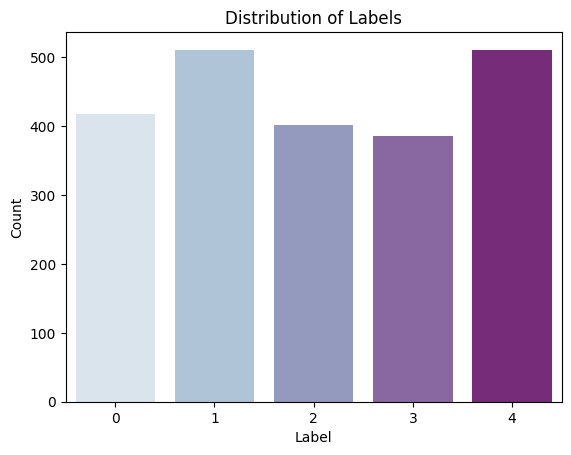

In [30]:
sns.countplot(data=df, x='Label', palette='BuPu')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

In [31]:
text = df['Text']
label = df['Label']

<div style="text-align:center; background-color:#dc3545; padding:20px;">
  <h1 style="font-size:36px; color:#ffeeba;"><b>2.Text Preprocessing</b></h1>
</div>


In [32]:
import re
def clean(text):
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = text.lower()
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [33]:
df['cleaned_text'] = df['Text'].apply(clean)

In [34]:
df['cleaned_text']

0       budget to set scene for election gordon brown ...
1       army chiefs in regiments decision military chi...
2       howard denies split over id cards michael howa...
3       observers to monitor uk election ministers wil...
4       kilroy names election seat target exchat show ...
                              ...                        
2220    india opens skies to competition india will al...
2221    yukos bankruptcy not us matter russian authori...
2222    survey confirms property slowdown government f...
2223    high fuel prices hit bas profits british airwa...
2224    us trade gap hits record in 2004 the gap betwe...
Name: cleaned_text, Length: 2225, dtype: object

# Removing Stopwords

In [35]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

def remove_stopwrods(text):
    filtered = ' '.join(word for word in text.split() if word not in stop_words)
    return filtered

[nltk_data] Downloading package stopwords to C:\Users\LENOVO
[nltk_data]     LS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwrods)

# Tokenization, Lemmatizationm, Stemming

In [37]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
import nltk
nltk.download('punkt_tab')
# Initialize lemmatizer and stemmer
def tokenize(text): # tokenize text into words
    ans = word_tokenize(text)
    return ans

def stemmer(text): # apply stemming on text
    stemmer_instance = PorterStemmer()
    ans = [stemmer_instance.stem(word) for word in text]
    return ans

def lemmatizer(text): # apply lemmatization on text
    ans = [WordNetLemmatizer().lemmatize(word) for word in text]
    return ans

[nltk_data] Downloading package punkt to C:\Users\LENOVO
[nltk_data]     LS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\LENOVO
[nltk_data]     LS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\LENOVO
[nltk_data]     LS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [38]:
df['tockenized'] = df['cleaned_text'].apply(lambda x: tokenize(x))

In [39]:
# Thsi is for solving the problem of lemmatization in kaggle
import zipfile
import os

# Define a path for NLTK data
nltk.data.path.append('/kaggle/working/nltk_data')

# Download WordNet and its dependencies
nltk.download('wordnet', download_dir='/kaggle/working/nltk_data')
nltk.download('omw-1.4', download_dir='/kaggle/working/nltk_data')


# Define the path to corpora
corpora_path = '/kaggle/working/nltk_data/corpora'

# Extract wordnet.zip
with zipfile.ZipFile(os.path.join(corpora_path, 'wordnet.zip'), 'r') as zip_ref:
    zip_ref.extractall(corpora_path)

# Extract omw-1.4.zip
with zipfile.ZipFile(os.path.join(corpora_path, 'omw-1.4.zip'), 'r') as zip_ref:
    zip_ref.extractall(corpora_path)

print("Extraction complete.")

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Extraction complete.


In [40]:
df['tockenized'] = df['tockenized'].apply(lambda x: lemmatizer(x))

In [41]:
df['tockenized'] = df['tockenized'].apply(lambda x: stemmer(x))

In [42]:
from tensorflow import keras
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(df['tockenized'])
df['sequence'] = tokenizer.texts_to_sequences(df['tockenized'])

In [43]:
df.head()

,Text,Label,cleaned_text,tockenized,sequence
0,Budget to set scene for election\n \n Gordon B...,0,budget set scene election gordon brown seek pu...,"[budget, set, scene, elect, gordon, brown, see...","[392, 51, 1319, 63, 754, 139, 709, 102, 138, 3..."
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs regiments decision military chiefs...,"[armi, chief, regiment, decis, militari, chief...","[2595, 148, 2728, 182, 1887, 148, 60, 155, 16,..."
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split id cards michael howard de...,"[howard, deni, split, id, card, michael, howar...","[237, 453, 1798, 717, 355, 331, 237, 453, 1082..."
3,Observers to monitor UK election\n \n Minister...,0,observers monitor uk election ministers invite...,"[observ, monitor, uk, elect, minist, invit, in...","[1647, 1057, 29, 63, 64, 1975, 151, 1647, 1563..."
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target exchat show ...,"[kilroy, name, elect, seat, target, exchat, sh...","[3655, 218, 63, 1098, 361, 9498, 30, 548, 755,..."


In [44]:
len(df['sequence'])

2225

In [45]:
(df['sequence'].apply(lambda x:len(x)))/len(df['sequence'])

0       0.141124
1       0.122697
2       0.142472
3       0.135281
4       0.117753
          ...   
2220    0.065169
2221    0.104270
2222    0.080000
2223    0.119101
2224    0.092135
Name: sequence, Length: 2225, dtype: float64

In [46]:
input_shape=int(sum(df['sequence'].apply(lambda x:len(x)))/len(df['sequence']))

In [47]:
input_shape

222

In [48]:
from keras.preprocessing.sequence import pad_sequences

lengths = [len(seq) for seq in df['sequence']]

# Get some statistics
print(f"Average length: {np.mean(lengths)}")
print(f"Median length: {np.median(lengths)}")
print(f"95th percentile: {np.percentile(lengths, 95)}")
print(f"Max length: {max(lengths)}")

Average length: 222.9429213483146
Median length: 197.0
95th percentile: 409.0
Max length: 2242


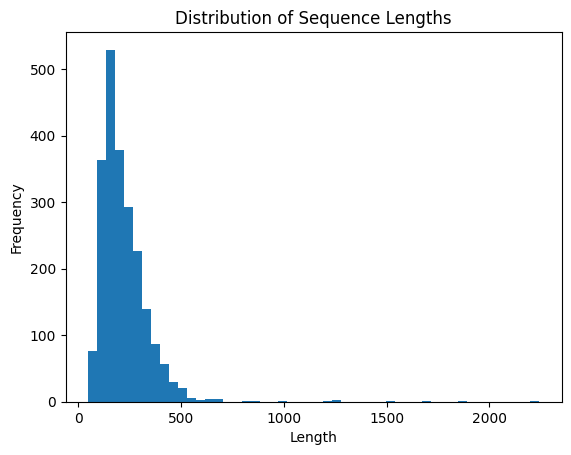

In [49]:
import matplotlib.pyplot as plt
plt.hist(lengths, bins=50)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [50]:
# Sequence Padding
from keras.preprocessing.sequence import pad_sequences
X=pad_sequences(df['sequence'],maxlen=197)

In [51]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
y=LB.fit_transform(label)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=100)
print("X_train : \n",X_train)
print("X_test  : \n",X_test)

X_train : 
 [[   0    0    0 ...  995   18   13]
 [   0    0    0 ...   97  366 5342]
 [   0    0    0 ... 1815   85 2023]
 ...
 [   0    0    0 ... 7440 1108   71]
 [   0    0    0 ...  604  681 2021]
 [   0    0    0 ... 5972  169 1577]]
X_test  : 
 [[    0     0     0 ...  1962   186   180]
 [    0     0     0 ...   316  1659  3164]
 [    0     0     0 ...  2168   753   573]
 ...
 [18830   246  2746 ...   338   964  4530]
 [ 1410   854    50 ...    21   443    24]
 [    0     0     0 ...   882     3   114]]


In [53]:
print("X_train shape : ",X_train.shape)
print("X_test  shape : ",X_test.shape)

X_train shape :  (1780, 197)
X_test  shape :  (445, 197)


In [54]:
Max_words=(max(map(max, X)))+1

In [55]:
Max_words

np.int32(24110)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    
    Embedding(Max_words + 1, 100, input_length=input_shape),
    
    LSTM(256, return_sequences=True),
    Dropout(0.3),
    
    LSTM(128),
    Dropout(0.3),
    
    Dense(32, activation='selu'),
    Dropout(0.2),
    
    Dense(5, activation='softmax')
])

C:\Users\LENOVO  LS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [57]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [58]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

checkpoint_path = "model_checkpoints/checkpoint.weights.h5"
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5),
    ModelCheckpoint(
        filepath=checkpoint_path,
        save_weights_only=True,
        save_best_only=True,
        monitor='val_accuracy',
        verbose=1
    )

]

In [59]:
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=20,
    callbacks= callbacks,
    validation_split=0.2,
    verbose=1
)

Epoch 1/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.3314 - loss: 1.5122
Epoch 1: val_accuracy improved from -inf to 0.64045, saving model to model_checkpoints/checkpoint.weights.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 20s 232ms/step - accuracy: 0.3333 - loss: 1.5089 - val_accuracy: 0.6404 - val_loss: 0.8177 - learning_rate: 0.0010
Epoch 2/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.7366 - loss: 0.6249
Epoch 2: val_accuracy improved from 0.64045 to 0.88764, saving model to model_checkpoints/checkpoint.weights.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 16s 224ms/step - accuracy: 0.7376 - loss: 0.6232 - val_accuracy: 0.8876 - val_loss: 0.3357 - learning_rate: 0.0010
Epoch 3/25
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.9300 - loss: 0.2019
Epoch 3: val_accuracy improved from 0.88764 to 0.91573, saving model to model_checkpoints/checkpoint.weights.h5
72/72 ━━━━━━━━━━━━━━━━━━━━ 18s 249ms/step - accuracy: 0.9302 - loss: 0.2013 - val_accuracy: 0.9157 - val_loss: 0.3497 - learn

In [60]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"\nTest accuracy: {test_accuracy:.4f}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9246 - loss: 0.4291

Test accuracy: 0.9281
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        84
           1       0.95      0.95      0.95       100
           2       0.99      0.90      0.94        91
           3       0.87      0.95      0.91        64
           4       0.93      0.93      0.93       106

    accuracy                           0.93       445
   macro avg       0.93      0.93      0.93       445
weighted avg       0.93      0.93      0.93       445


Confusion Matrix:
[[76  1  0  2  5]
 [ 3 95  0  1  1]
 [ 1  1 82  5  2]
 [ 1  1  1 61  0]
 [ 4  2  0  1 99]]


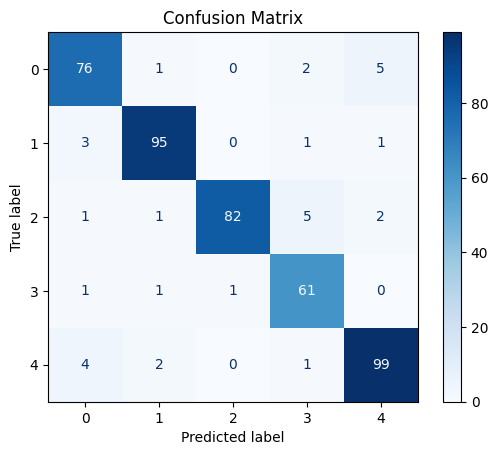

In [61]:
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()